# Proyecto #2
### Predicciones de Ingresos

- Eres dueño de un negocio de helados y queres crear un modelo para predecir los ingresos diarios en dólares basados en la temperatura (degC)
- Decidiste construir una simple Red Neuronal Artificial para resolver este problema.
> Conjunto de datos:
>
    >> Estrada (X): Temperatura del aire exterior
>
    >> Salida (Y): Ingresos diarios totales generados en dólares

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2024-09-18 13:38:00.747068: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-18 13:38:00.910662: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 13:38:01.014308: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 13:38:01.040593: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-18 13:38:01.161975: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Importando datos
sales_df = pd.read_csv('./datos_de_ventas.csv')
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


<Axes: xlabel='Temperature', ylabel='Revenue'>

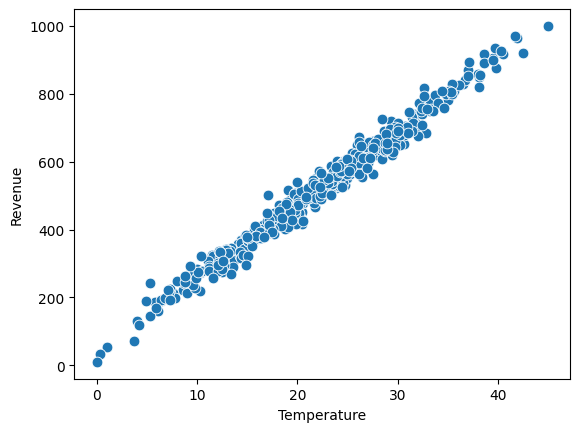

In [3]:
# Visualización
sns.scatterplot(x = sales_df['Temperature'], y = sales_df['Revenue'], s=60)

In [4]:
# Creando el set de entrenamiento
X_train = sales_df['Temperature']
Y_train = sales_df['Revenue']

In [16]:
# Creamos el modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))  # Capa de entrada
model.add(tf.keras.layers.Dense(units=1))   # Capa densa con una neurona
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

NameError: name 'model' is not defined

In [18]:
# Entrenamiento
epochs_hist = model.fit(X_train, Y_train, epochs=1000)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - loss: 294771.1250
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 253250.0781
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 214478.3750
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 185386.8125
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 150457.1406
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 136149.4531
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 113238.7891
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 88783.5703
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 72360.5156  
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 60408.6523
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 47992.4805
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 38801.1758
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 29547.8457
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━

In [6]:
# Veamos las llaves de nuetro modelo. Los parámetros
keys = epochs_hist.history.keys()
#print(keys)

NameError: name 'epochs_hist' is not defined

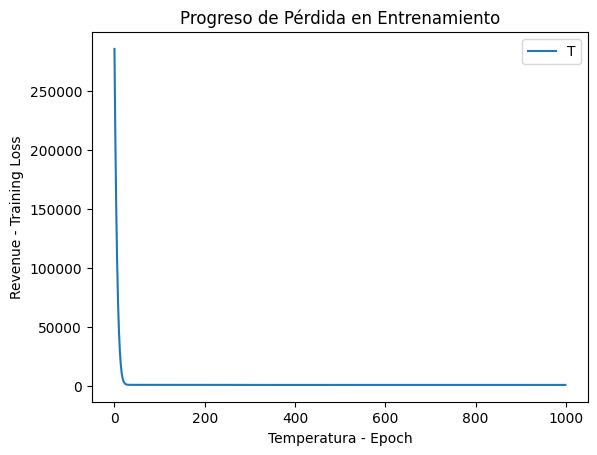

In [21]:
# Grafiquemos el entrenamiento de nuestro modelo
plt.plot(epochs_hist.history['loss'])
plt.title("Progreso de Pérdida en Entrenamiento")
plt.xlabel("Temperatura - Epoch")
plt.ylabel("Revenue - Training Loss")
plt.legend("Training Loss")

In [7]:
# Obteniendo los pesos para evaluar nuestro modelo
weights = model.get_weights()
#print(weights)

# Haciendo la predicción
Temp = np.array([[35]])
Revenue = model.predict(Temp)
print('La ganancia según la red neuronal será de: ', Revenue)

NameError: name 'model' is not defined

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step


Text(0.5, 1.0, 'Ganancia Generada vs Temperatura - @Empresa de Helados')

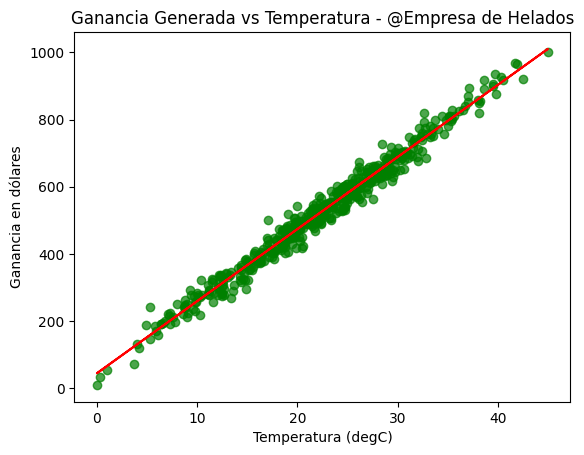

In [31]:
# Correlación de precios - Gráfica de predicción
plt.scatter(X_train, Y_train, color='green', alpha=0.7)
plt.plot(X_train, model.predict(X_train), color='red')
plt.ylabel("Ganancia en dólares")
plt.xlabel("Temperatura (degC)")
plt.title("Ganancia Generada vs Temperatura - @Empresa de Helados")